In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Player:
    
    def __init__(self, name, L, n1):
        self.L = L        
        self.name = name
        self.matmain = np.full((L, L), -1)
        self.matrecord = np.zeros((L, L), dtype=int) #your register of choices regarding attacks in the opponent        
        self.n_ship = n1
        
    def measures(self):         
        self.n_ship = np.sum(self.matmain==1)  

    def initialize_mat(self,n0,n1): 
        aux0 = np.zeros((n0), dtype=int)
        aux1 = np.ones((n1), dtype=int)
        full = np.concatenate( (aux0,aux1), axis=None)
        np.random.shuffle(full)
        self.matmain = np.reshape(full , (L, L)) 
                
    def attack(self,obj_opp):                 
        # Now pick  at random (x,y)  from your board of choices self.matrecord == 0 (you haven't chosen previously)
        x0_choices, y0_choices = np.where( self.matrecord==0 ) 
        chosen = rd.randint(0,len(x0_choices)-1)                         

        x = x0_choices[chosen]
        y = y0_choices[chosen]

        if obj_opp.matmain[x,y] == 1: 
            #print('you hitted', obj_opp.matmain[x,y], "(x,y)=", x,y )
            obj_opp.matmain[x,y] = 0
            self.matrecord[x,y] = 1
        else: 
            #print('you missed', obj_opp.matmain[x,y], "(x,y)=", x,y )
            self.matrecord[x,y] = 2
            
    def plot_board(self, nattack, nplot, nvalues=2):        
        
        plt.subplot(1,2,nplot)

        plt.imshow( self.matmain, cmap=plt.cm.get_cmap('Blues', nvalues), origin='lower')
        plt.colorbar(ticks=range(nvalues))
        
        plt.clim(-0.5, nvalues-0.5)     
        plt.xticks([]),plt.yticks([])
        if nattack==0: plt.title("Board of %s at t=0"%(self.name) )
        else:  plt.title("Board of %s after t=%d attacks"%(self.name, nattack) )


 --------------------------- Declarations and initializaions --------------------------- 
 --------------------------- Dynamics of alternating attacks --------------------------- 
nship(Eduardo)=15    nship(Monica)=14
nship(Eduardo)=15    nship(Monica)=14
nship(Eduardo)=15    nship(Monica)=13
nship(Eduardo)=15    nship(Monica)=12
nship(Eduardo)=15    nship(Monica)=11
nship(Eduardo)=14    nship(Monica)=11
nship(Eduardo)=14    nship(Monica)=10
nship(Eduardo)=14    nship(Monica)=9
nship(Eduardo)=14    nship(Monica)=8
nship(Eduardo)=14    nship(Monica)=7
nship(Eduardo)=13    nship(Monica)=7
nship(Eduardo)=12    nship(Monica)=7
nship(Eduardo)=11    nship(Monica)=7
nship(Eduardo)=10    nship(Monica)=7
nship(Eduardo)=9    nship(Monica)=7
nship(Eduardo)=8    nship(Monica)=7
nship(Eduardo)=8    nship(Monica)=6
nship(Eduardo)=7    nship(Monica)=6
nship(Eduardo)=6    nship(Monica)=6
nship(Eduardo)=5    nship(Monica)=6
nship(Eduardo)=4    nship(Monica)=6
nship(Eduardo)=4    nship(Monica)=5
nship(E

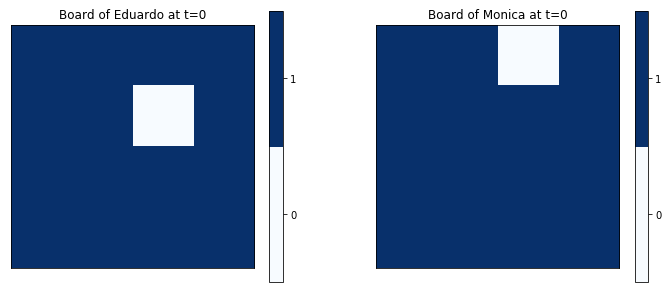

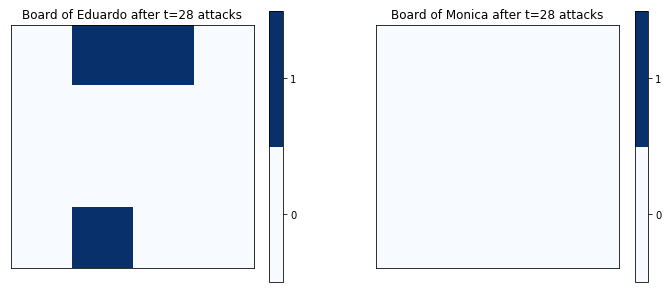

In [3]:
print(' --------------------------- Declarations and initializaions --------------------------- ')
L  = 4
n1 = 15
n0 = L*L - n1
nattack = n1

obj1 = Player('Eduardo',L, n1)
obj2 = Player('Monica' ,L, n1)

obj1.initialize_mat( n0, n1)
obj2.initialize_mat( n0, n1)

plt.figure(figsize=(12,5))
obj1.plot_board(0,nplot=1,nvalues=2)
obj2.plot_board(0,nplot=2,nvalues=2)


print(' --------------------------- Dynamics of alternating attacks --------------------------- ')
nattack = 0
while( obj1.n_ship>0 and obj2.n_ship>0 ):    
    
    # flip a coin to see who will attack in this turn
    if rd.random()<0.5: obj1.attack(obj2) # player_1 attacks player_2         
    else: obj2.attack(obj1) # player_2 attacks player_1 
    
    # measures
    obj1.measures()
    obj2.measures()

    print("nship(%s)=%d    nship(%s)=%d"%(obj1.name,obj1.n_ship,obj2.name,obj2.n_ship) )
    
    nattack=nattack+1

print(' --------------------------- see the results --------------------------- ')
plt.figure(figsize=(12,5))
obj1.plot_board(nattack,nplot=1)
obj2.plot_board(nattack,nplot=2)